# 精准率-召回率的关系曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits() # 加载手写数字识别数据集
X = digits.data
y = digits.target.copy()
# 多分类问题转换为二分类问题，即等于9和不等于9,数据比例大约是1:9,也就是说我们只要全认为是非9，按照传统计算正确率的方法我们也有90%的正确率
y[digits.target==9] = 1
y[digits.target!=9] = 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [3]:
decision_scores = log_reg.decision_function(X_test)

In [4]:
# 所有的边界阈值
thresholds = np.arange(decision_scores.min(), decision_scores.max())

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precisions = []
recalls = []

In [6]:
# 循环所有的边界阈值
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

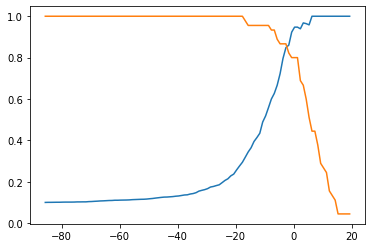

In [7]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

## 精准率召回率曲线
> X轴是精准率Precision，y轴是召回率Recall

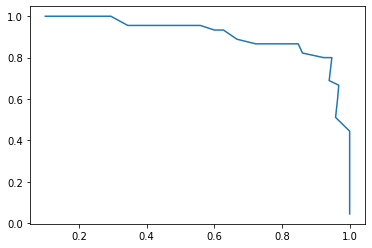

In [8]:
plt.plot(precisions, recalls)
plt.show()

## sklearn中的精准率-召回率曲线

In [9]:
from sklearn.metrics import precision_recall_curve

In [10]:
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [11]:
precisions.shape

(145,)

In [12]:
recalls.shape

(145,)

In [13]:
thresholds.shape

(144,)

### 绘制精准率和召回率随着边界阈值的曲线
> 可以从下面的曲线选出合适的threshold

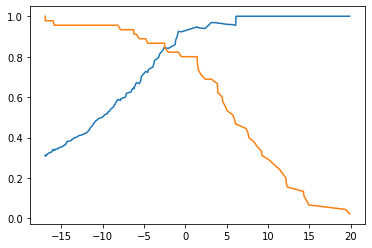

In [16]:
plt.plot(thresholds, precisions[:-1]) # [:-1]是为了让数据的长度都是144
plt.plot(thresholds, recalls[:-1])
plt.show()

### 绘制精准率-召回率的曲线

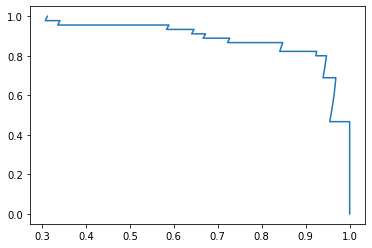

In [17]:
plt.plot(precisions, recalls)
plt.show()